Данные в датасете app_stats.csv понедельно, 52 недели. Получается год
=

- week_number - Номер недели
- installs - Число пользователей, скачавших «Книжного грызуна»
- payments - количество платежей
- ad_campaign - Количество проведённых рекламных кампаний в каждую из недель

Что можно узнать на основе этих данных?
=

- Сколько всего пользователей у Книжного грызунаа
- Общее количество установок за изучаемай период
- Сколько денег заработало приоложение
- Общее количество платежей за изучаемый период
- Общую конверсию за изучаемый период: отношение суммарного числа платежей ко всему- становкам
- Конверсия по неделям
- Количество рекламных кампаний за иий чаемый период
- Окупилась ли определённая рекламная кампания

Стоимость платной версии и рекламной компании
-

- 60 рублей за 1 установку
- 600 рублей получаете за каждый переход на платную версию
- Рекламная кампания окупится, если каждая «рекламная» установка в среднем принесёт не менее 60 рублей.
- Такой результат будет, если как минимум каждый десятый скачавший приложение купит платную версию.

Гипотеза
-

Теперь известно, что компания в среднем тратит 60 рублей, чтобы получить одну установку приложения. Если запустить рекламу в социальной сети и потратить на неё 60 тысяч рублей, «Книжный грызун» получит примерно 1000 установок. Часть пользователей, установивших приложение, переходят на платную подписку стоимостью 600 рублей.
Маркетолог считает конверсию так: делит общее число платежей на общее количество установок. Если конверсия больше 10% — рекламные кампании окупились.
Дополнительной проверкой может служить денежный результат. Чтобы узнать, сколько денег в среднем принесла «Книжному грызуну» каждая рекламная установка, полученную конверсию можно умножить на 600 рублей — размер одного платежа. Если результат окажется больше 60 рублей, заработанное точно превышает потраченноега.

In [1]:
# импортируйте библиотеку pandas
import pandas as pd

# прочитайте файл и сохраните его в переменной data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('app_stats.csv')

# выведите data на экран
data

,week_number,installs,payments,ad_campaign
0,0,29486,3541,0
1,1,30830,4275,0
2,2,31970,4404,0
3,3,34361,4463,0
4,4,33968,4358,0
5,5,34912,4310,0
6,6,35118,4427,0
7,7,49296,6836,1
8,8,35969,4366,0
9,9,50182,6426,1


Посчитаем среднюю конверсию за год и доход от одной установки
-

In [8]:
average_conversion = sum(data['payments']) / sum(data['installs'])
income_1installs = average_conversion * 600

print('\nЗначение средней конверсии - ', average_conversion)
print('В среднем приносит одна установка - ', income_1installs)


Значение средней конверсии -  0.126526669919455
В среднем приносит одна установка -  75.916001951673


Выводы
=

- в среднем одна установка приложения приносит «Книжному грызуну» почти 76 рублей. Это на 16 рублей больше, чем стоимость рекламы, — значит, рекламные кампании окупаются. Но на самом деле не всё так просто.
- Конверсия могла измениться. Например, год назад она была высокой, а теперь снизилась. Маркетолог считает среднюю конверсию, а не актуальную
- Не факт, что «рекламные» пользователи будут так же охотно покупать платную версию, как это делают те, кто нашёл приложение самостоятельно

Новая гипотеза
=
- Брать среднюю конверсию не совсем честно: конверсия могла меняться в течение года. Правильнее взять наиболее актуальную — результат может быть другим
- Конверсия «рекламных» пользователей может сильно отличаться от обычной.

Посчитаем конверсию и средний доход от одной установки по каждой из последних восьми недель. Будем считать, что конверсия «старше» двух месяцев уже вряд ли актуальна. Для этого посмотрим последние 8 недель конверсии

In [10]:
conversion = data['payments'] / data['installs']
print(conversion.tail(8))

44    0.135987
45    0.120498
46    0.128131
47    0.132071
48    0.130854
49    0.119030
50    0.120828
51    0.121148
dtype: float64


Посмотрим средний доход от одной установки для каждой недели

In [11]:
print(conversion.tail(8) * 600)

44    81.592134
45    72.299082
46    76.878694
47    79.242640
48    78.512340
49    71.418105
50    72.496653
51    72.688851
dtype: float64


Вывод
=
в каждую из последних восьми недель конверсия установок в покупки «Книжного грызуна» примерно одинакова и выше 10%, а средний доход от одной установки — больше 60 рублей

Посстроим теловую карту и посмотрим на результаты

<Axes: >

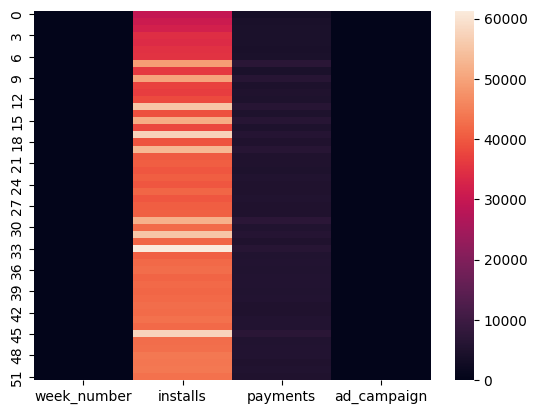

In [12]:
import seaborn as sn
sn.heatmap(data)

Тепловая карта не очень подходит для анализа в данном случае т.к. данные не однородные, но можно сделать следующие выводы 
- Количество скачавших «Грызуна» сильно превышает число купивших платную версию
- В недели 7, 9, 13, 15, 17, 19, 29, 31, 33 и 45 было больше всего установок и платежей
- Без учёта выделяющихся недель число установок и платежей плавно растёт

логичнее визуализировать каждый столбец отдельно

<Axes: xlabel='week_number', ylabel='installs'>

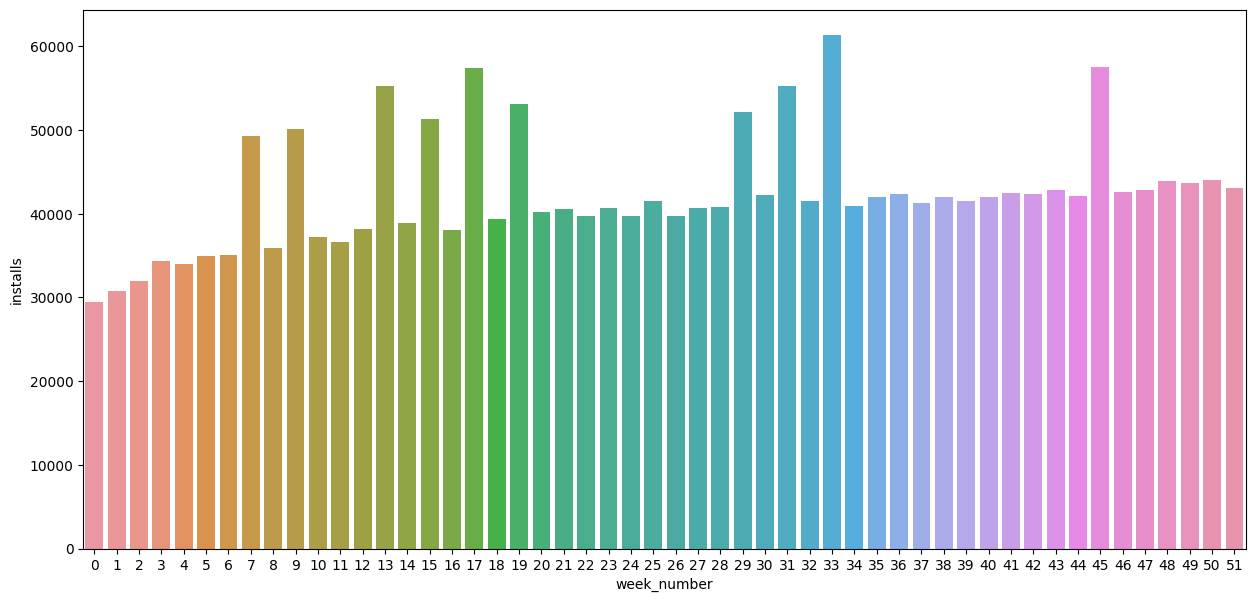

In [19]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = [15, 7]
sn.barplot(x=data['week_number'], y=data['installs'])

Видны пики на графике на 7,9,13,15,17,19,29,31,33,45 неделе. Возможно они связаны с рекламными компаниями

<Axes: xlabel='week_number', ylabel='ad_campaign'>

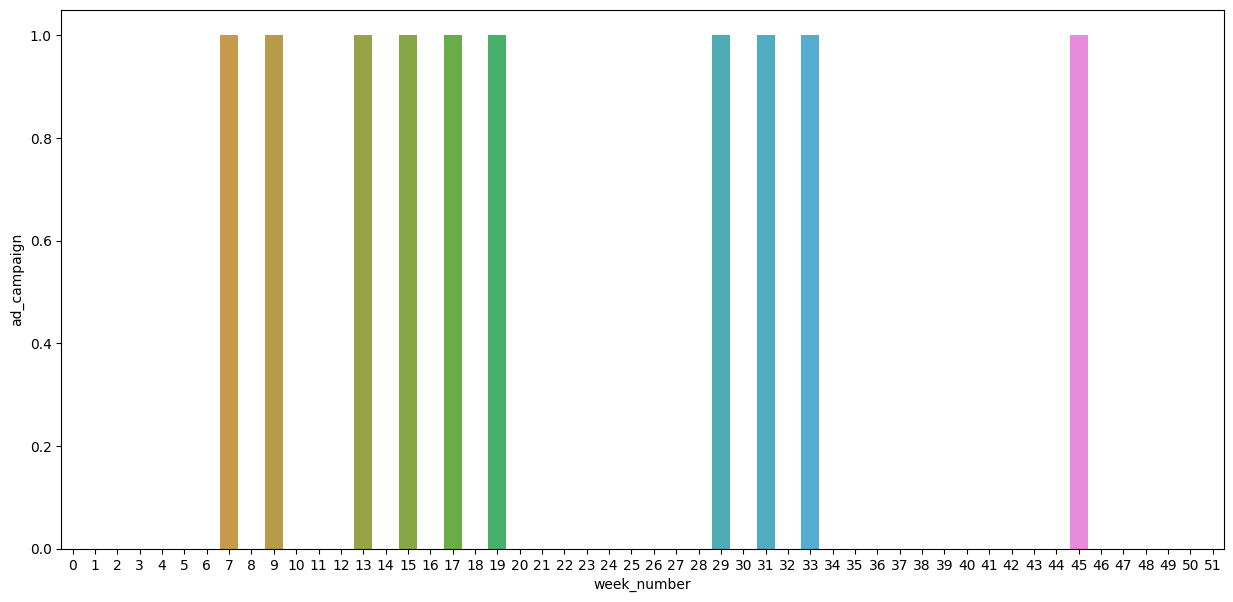

In [20]:
sn.barplot(x=data['week_number'], y=data['ad_campaign'])

Идеальное совпадение, знаичт рекламные компании влияют на рост установок
Интересно, как обстоят дела с платежами

<Axes: xlabel='week_number', ylabel='payments'>

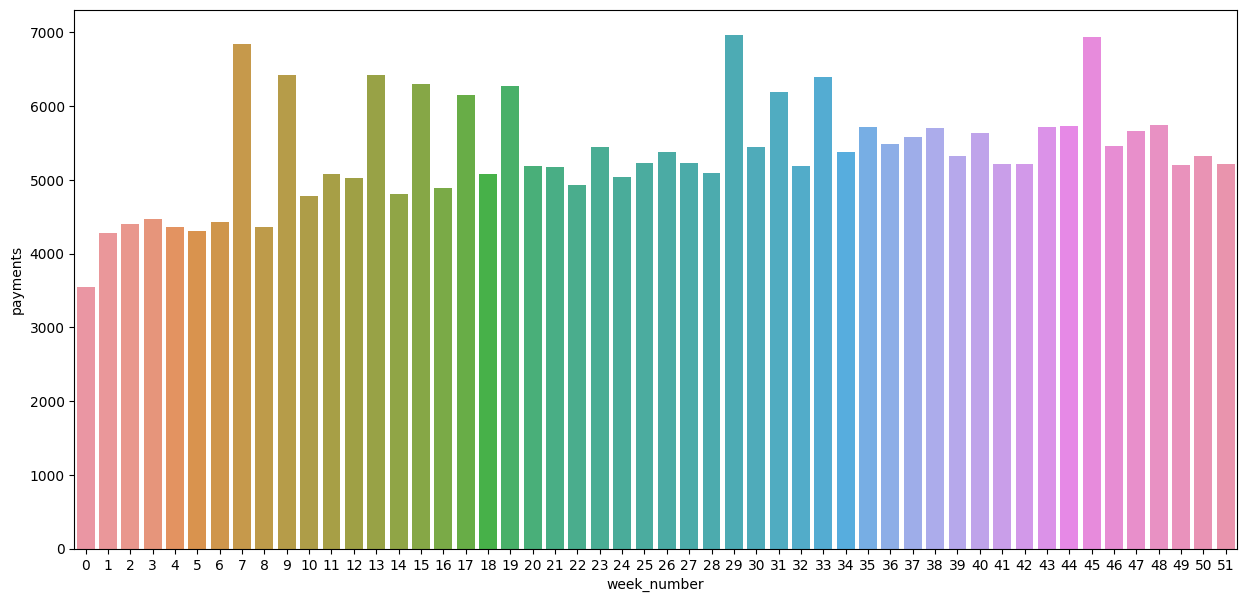

In [23]:
sn.barplot(x=data['week_number'], y=data['payments'])

Влияние рекламы заметно, пиков тут меньше но они совпадают по времени с проведением рекламных компаний

Посмотрим конверсию на графике по неделям

<Axes: xlabel='week_number'>

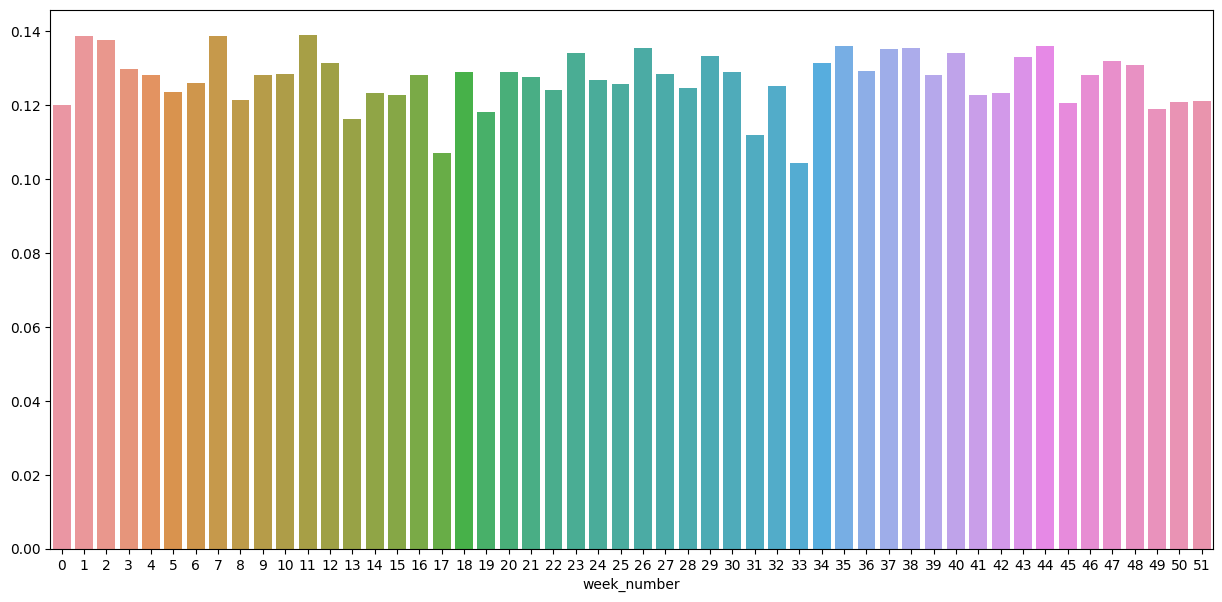

In [25]:
conversions = data['payments'] / data['installs']
sn.barplot(x=data['week_number'], y=conversions)

Есть провалы, но серьезного отклоненя от средней по году не видно.
Попробуем найти рекламные установки.
Для этого вычтем установки из пиковых недели установок  предыдущую, когда рекламной компании не было

In [27]:
# номера интересующих недель
campaign_weeks = [7, 9, 13, 15, 17, 19, 29, 31, 33, 45]

#  разность между значениями в столбце data['installs']
diff_installs = data['installs'].diff() 

# выбор только требуемых недель из всех посчитанных разностей
installs_from_ads = diff_installs[campaign_weeks]

# вывод результата
print(installs_from_ads)

7     14178.0
9     14213.0
13    17028.0
15    12384.0
17    19370.0
19    13768.0
29    11324.0
31    13020.0
33    19840.0
45    15429.0
Name: installs, dtype: float64


Теперь оценим количество «рекламных» покупок и узнаем сколько пользователей купило грызуна благодаря рекламе

In [30]:
# посчитаем разность между соседними значениями в столбце data['payments']
diff_payments = data['payments'].diff()

# выбор только требуемых недель из всех посчитанных разностей
payments_from_ads = diff_payments[campaign_weeks]

# вывод результата
print(payments_from_ads)

7     2409.0
9     2060.0
13    1395.0
15    1495.0
17    1262.0
19    1192.0
29    1870.0
31     743.0
33    1207.0
45    1207.0
Name: payments, dtype: float64


Теперь посчитаем конверсию рекламных покупок

In [32]:
conversions_from_ads = payments_from_ads/ installs_from_ads
print(conversions_from_ads)

7     0.169911
9     0.144938
13    0.081924
15    0.120720
17    0.065152
19    0.086578
29    0.165136
31    0.057066
33    0.060837
45    0.078229
dtype: float64


Теперь можно посмотреть сколько денег принесла рекламная компания

In [33]:
ads_install_average_profit = conversions_from_ads * 600
print(ads_install_average_profit)

7     101.946678
9      86.962640
13     49.154334
15     72.432171
17     39.091378
19     51.946543
29     99.081597
31     34.239631
33     36.502016
45     46.937585
dtype: float64


Значения отклоняются от средне годового показателя в 76 руб

<Axes: >

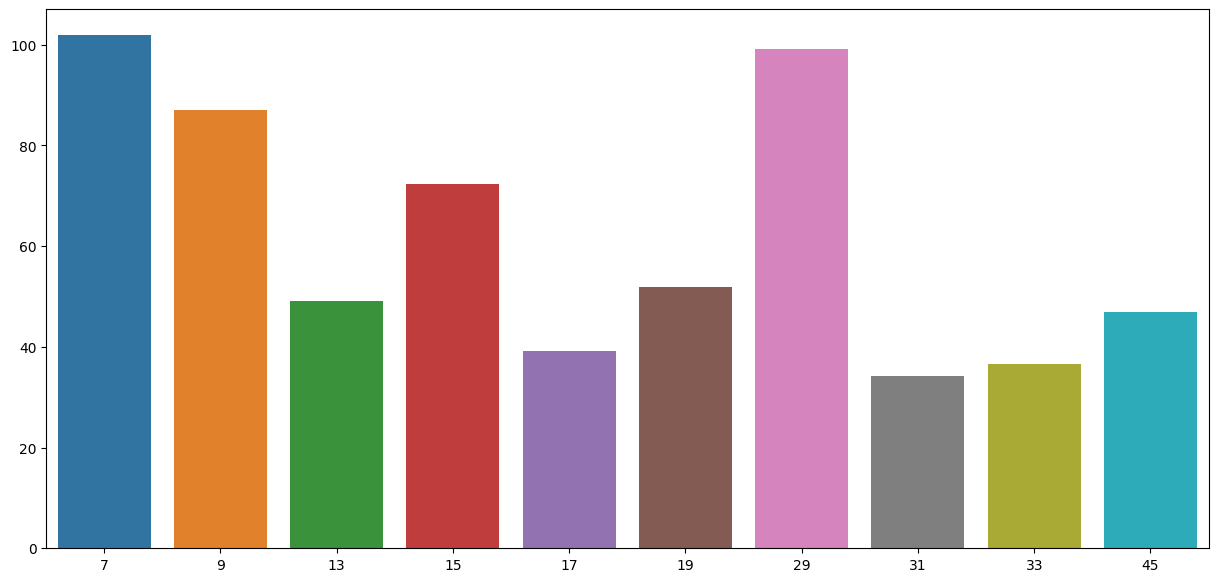

In [34]:
sn.barplot(x = campaign_weeks, y=ads_install_average_profit)

Одна рекламная установка обходится Книжному грызуну в 60 рублей, на графике видно что только 4 из 10 рекламных компаний преодолели этот показатель

Вывод
=

Общая среднегодовая конверсия непоказательна. Без выделения «рекламных» пользователей выходило, что все рекламные кампании «Книжного грызуна» окупаются, хотя на самом деле окупились меньше половины